In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import iqr
import sys
import importlib
from itertools import chain
from datetime import date

from uslib import fit_functions as ff
from uslib import load_data as ld

import matplotlib.animation as animation





In [2]:
data_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\16-07"

data_dir1 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\20-6-ushaped"

data_dir2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\17-07 (200 avg)"

data_dir3 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\18-07\SMSR_35dB_40avg"

data_dir4 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\18-07\SMSR_40dB"



#data_dirs = [data_dir,data_dir1,data_dir2, data_dir3,data_dir4]

data_dirs = [data_dir,data_dir1]

datasets_no = len(data_dirs)# len(data_dirs)

dirs= [None for _ in range(datasets_no)]

In [3]:
for i in range(datasets_no):
    dirs[i] = ld.get_SMSR_filtered_data(data_dirs[i])

In [14]:
# for i in range(len(dirs[0])):

#     if i%2 == 0:
            
#         try:
#             plt.figure()
#             plt.plot(dirs[0][i][5][0].times,dirs[0][i][5][0].voltages,'--')
#             #plt.ylim([-140,-60])
#         except:
#             pass

In [5]:
def dB_to_linear(datapoint_in_dB):

    return 10**(datapoint_in_dB/10)

def linear_to_dB(datapoint_linear):

    return 10*np.log10(datapoint_linear)

def p_to_micro(p_string:str):

    p_string = p_string.replace("p","0.")

    return p_string

In [6]:
for i in range(len(dirs[1][0][4])):
    fb_powers = p_to_micro(dirs[1][0][4][i].fb_power)
    print(fb_powers)


100
12
1
200
25
3
50
6
0.05
0.2
0.5
400


In [7]:
no_RIN_values = int(len(dirs[0]))

single_RIN_values = [None for _ in range(no_RIN_values)]
ps = [None for _ in range(no_RIN_values)]
fs = [None for _ in range(no_RIN_values)]
fb_powers = [None for _ in range(no_RIN_values)]


ps_linear = [[None for _ in range(int(200e3))] for _ in range(no_RIN_values)]




for i in range(no_RIN_values):
    
    if dirs[0][i][4] != None:
        fs[i] = dirs[0][i][4].freqs
        ps[i] = dirs[0][i][4].powers
        fb_powers[i] = dirs[0][i][4].fb_power

        for number, datapoint in enumerate(ps[i]):
            datapoint_linear = dB_to_linear(datapoint)

            ps_linear[i][number] = datapoint_linear

        single_RIN_values[i] = linear_to_dB( sum(ps_linear[i])*50 ) #Hz, summing all the datapoints and multiplying with the bandwidth, converting to dB

fb_powers = [float(power) for power in fb_powers if power != None]
single_RIN_values = [rin for rin in single_RIN_values if rin != None]

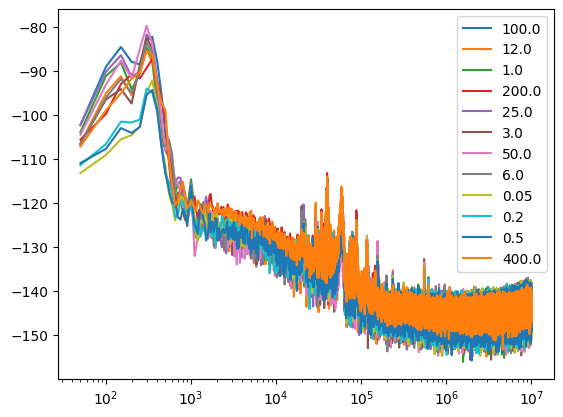

In [19]:
plt.figure(0)
for i in range(len(fb_powers_EDFA_free)):
    
    plt.plot(fs_EDFA_free[i],ps_EDFA_free[i],label=fb_powers_EDFA_free[i])
    #plt.plot(fs[0],ps[0],label=fb_powers[0])
    plt.xscale("log")
    plt.legend()

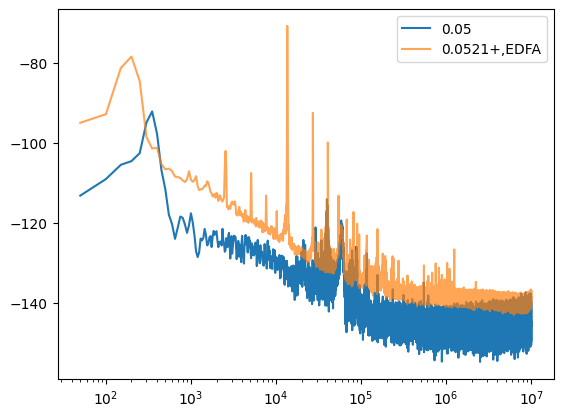

In [52]:
plt.figure(0)
for i in range(len(fb_powers_EDFA_free)):
    
    if abs(fb_powers_EDFA_free[i]-0.05) < 0.003:
        plt.plot(fs_EDFA_free[i],ps_EDFA_free[i],label=fb_powers_EDFA_free[i])
    #plt.plot(fs[0],ps[0],label=fb_powers[0])

for i in range(len(fb_powers)):

    if abs(fb_powers[i]-0.05) < 0.003:
        plt.plot(fs[i],ps[i],alpha=0.7,label=f'{fb_powers[i]}+,EDFA')

        #plt.plot(fs[0],ps[0],label=fb_powers[0])
plt.xscale("log")
plt.legend()

In [35]:
len(fs[17])

TypeError: object of type 'NoneType' has no len()

c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


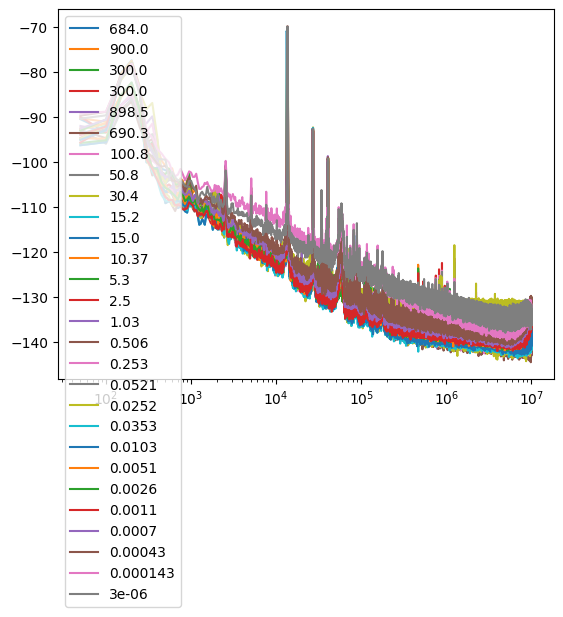

In [36]:
plt.figure(1)
for i in range(len(fb_powers)):

    try:
        plt.plot(fs[i],ps[i],label=fb_powers[i])
    except:
        pass

        #plt.plot(fs[0],ps[0],label=fb_powers[0])
plt.xscale("log")
plt.legend()

In [60]:
no_RIN_values_EDFA_free = int(len(dirs[1][0][4]))

single_RIN_values_EDFA_free = [None for _ in range(no_RIN_values_EDFA_free)]
ps_EDFA_free = [None for _ in range(no_RIN_values_EDFA_free)]
fs_EDFA_free = [None for _ in range(no_RIN_values_EDFA_free)]
fb_powers_EDFA_free = [None for _ in range(no_RIN_values_EDFA_free)]


ps_linear_EDFA_free = [[None for _ in range(int(200e3))] for _ in range(no_RIN_values_EDFA_free)]




for i in range(no_RIN_values_EDFA_free):
    
    if dirs[1][0][4][i] != None:
        fs_EDFA_free[i] = dirs[1][0][4][i].freqs
        ps_EDFA_free[i] = dirs[1][0][4][i].powers
        fb_powers_EDFA_free[i] = p_to_micro(dirs[1][0][4][i].fb_power)

        for number, datapoint in enumerate(ps_EDFA_free[i]):
            datapoint_linear = dB_to_linear(datapoint)

            ps_linear_EDFA_free[i][number] = datapoint_linear

        single_RIN_values_EDFA_free[i] = linear_to_dB( sum(ps_linear_EDFA_free[i])*50 ) #Hz, summing all the datapoints and multiplying with the bandwidth, converting to dB

fb_powers_EDFA_free = [float(power) for power in fb_powers_EDFA_free if power != None]
single_RIN_values_EDFA_free = [rin for rin in single_RIN_values_EDFA_free if rin != None]

In [59]:
fb_powers_EDFA_free

[100.0, 12.0, 1.0, 200.0, 25.0, 3.0, 50.0, 6.0, 0.05, 0.2, 0.5, 400.0]

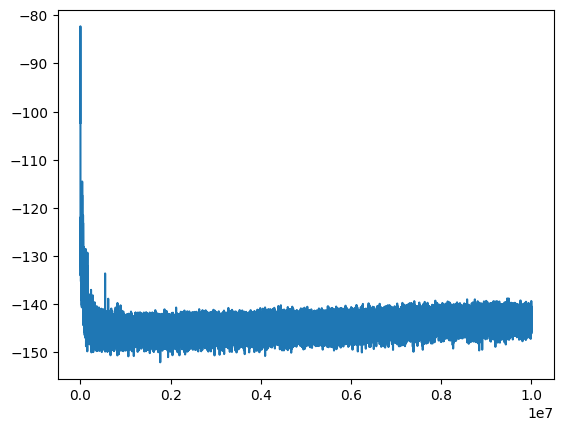

In [58]:
plt.plot(fs_EDFA_free[0],ps_EDFA_free[0])

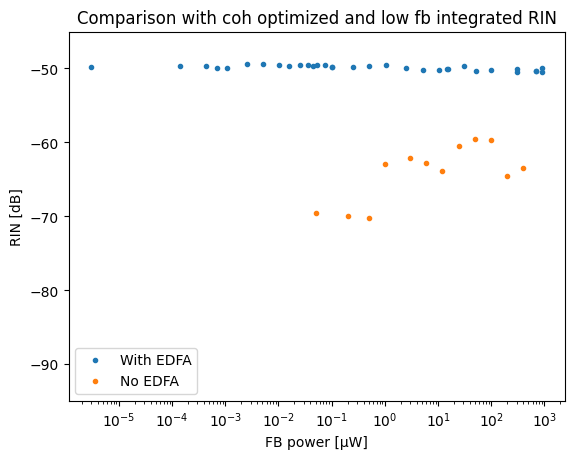

In [65]:
plt.figure()
plt.title('Comparison with coh optimized and low fb integrated RIN')
plt.plot(fb_powers,single_RIN_values,'.', label='With EDFA')
plt.plot(fb_powers_EDFA_free,single_RIN_values_EDFA_free,'.',label='No EDFA')
plt.xlabel('FB power [µW]')
plt.ylabel('RIN [dB]')
plt.xscale('log')
plt.ylim([-95,-45])
plt.legend()

#plt.savefig(r'./RINvsFB.png')
#plt.savefig(r'./RINvsFB.pdf')
#np.savetxt(r'./RINvsFB.txt',np.transpose([fb_powers, single_RIN_values]),header='RIN vs feedback \nRIN was calculated by transforming dB/Hz to linear scale, summing all datapoints and multiplying with 50Hz (bandwidth). Then transforming linear scale to dB again. \nFB powers [µW], RIN [dB]')

In [63]:
single_RIN_values_EDFA_free,single_RIN_values

([-59.70728291492585,
  -63.90375095586482,
  -62.908526548753684,
  -64.5050993487394,
  -60.46892325470357,
  -62.115311209604805,
  -59.57856598715094,
  -62.814425514519215,
  -69.60599886381107,
  -69.89322427855969,
  -70.289858463853,
  -63.43356100090609],
 [-50.308132258707765,
  -49.93091476617248,
  -50.1159026706673,
  -50.523066092837524,
  -50.4303584833643,
  -50.326384686884246,
  -50.24327977620841,
  -50.394037502302126,
  -49.69038995571111,
  -50.12285824460069,
  -50.12285824460069,
  -50.19985305018035,
  -50.14585231984134,
  -49.87097473915641,
  -49.55270397848813,
  -49.73142152250528,
  -49.840785653612514,
  -49.738859657570046,
  -49.57518474997899,
  -49.52816981985335,
  -49.738859657570046,
  -49.51606224537088,
  -49.549777588975715,
  -49.6441181373175,
  -49.61440924826288,
  -49.49633847738504,
  -49.344064465020985,
  -49.33963078174301,
  -49.87670581522653,
  -49.93378307162948,
  -49.639943944347436,
  -49.63295649979317,
  -49.8190892181481])

In [23]:
# for i in range(len(dirs[0])):
#     try:
#         plt.figure()
#         dirs[0][i][4].plot()
#         plt.ylim([-140,-60])
#     except:
#         pass

#50Hz bandwidth, convert to linear, then sum all datapoints and multiply with bandwidth to obtain single value for RIN.

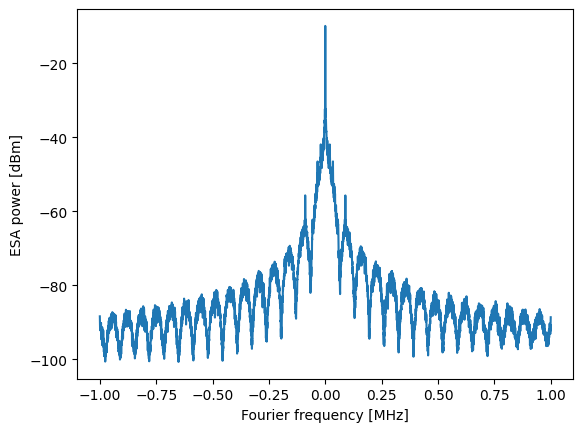

In [24]:
dirs[0][0][2][0].plot()

In [25]:
dirs[0][0][2]

In [26]:
### REMEMBER to update result list for 684µW with newly extracted linewidths!!! ###

In [27]:
[[[None for _ in range(len(dirs[ds_no][fb_meas_no][2])) ] for fb_meas_no in range(0,len(dirs[ds_no]),2)] for ds_no in range(datasets_no)]

[[[None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None],
  [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None],
  [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None],
  [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None],
  [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None],
  [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   No

In [28]:
test = [1,2,3]
test1 = test.copy()
for i,num in enumerate(test1):
    test1[i] += 1

In [29]:
measurements = [[[None for _ in range(len(dirs[ds_no][fb_meas_index][2])) ] for fb_meas_index in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]
laser_powers = [[None for _ in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]
feedback_powers = [[None for _ in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]
delays = [[None for _ in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]
feedback_ratios =[[None for _ in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]

for data_index in range(datasets_no):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:

    for fb_meas_index in range(len(dirs[data_index])):
        for i, directory in enumerate(dirs[data_index][fb_meas_index][2]): #Close spectrum is index 2
            
            if directory == None:
                pass
            else:
                fs = directory.freqs #Obtaining ESA close spectrum frequencies
                ps = directory.powers #Obtaining ESA close spectrum powers

                plot = False
            
                #fs, ps = dp.get_close_spectrum_from_folder(directory,plot=plot,center_about_carrier=True)

                measurements[data_index][fb_meas_index][i] = fs, ps

                if plot:
                        
                    plt.figure()
                    plt.plot(fs,ps)
                    plt.xlim([-0.6,0.6])
                    plt.ylim([-120,-40])
                    plt.xlabel('Frequency detuning [MHz]')
                    plt.ylabel('Spectrum power [dBc]')
                    plt.title(f'Plot number {i}')
                    
        laser_powers[data_index][fb_meas_index] = dirs[data_index][fb_meas_index][6][' Output power']
        
        feedback_powers[data_index][fb_meas_index] = dirs[data_index][fb_meas_index][6][' Feedback power']



        delays[data_index][fb_meas_index] = dirs[data_index][fb_meas_index][6][' Delay']
        feedback_ratios[data_index][fb_meas_index] = ld.feedback_ratio(laser_powers[data_index][fb_meas_index],feedback_powers[data_index][fb_meas_index],laser_powers[data_index][fb_meas_index], laser_power_coef=1)

C:\Users\au617810\AppData\Local\Temp\ipykernel_14272\1899971693.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000024B30440860> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

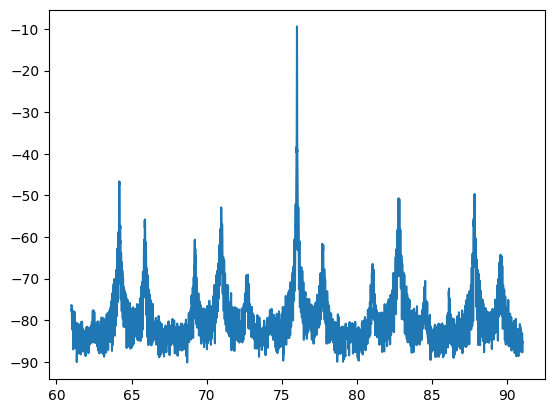

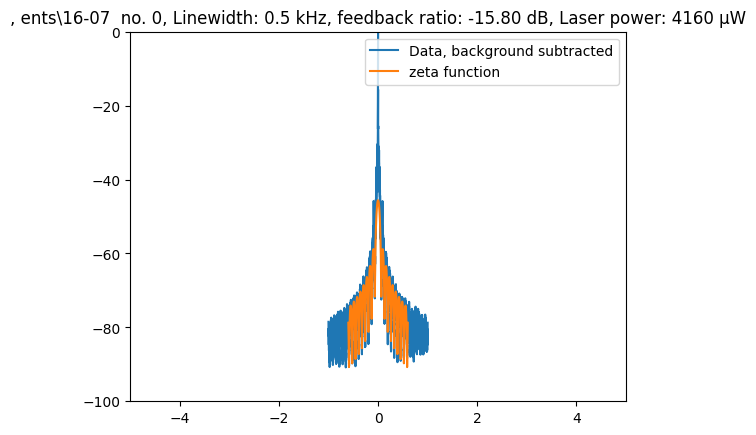

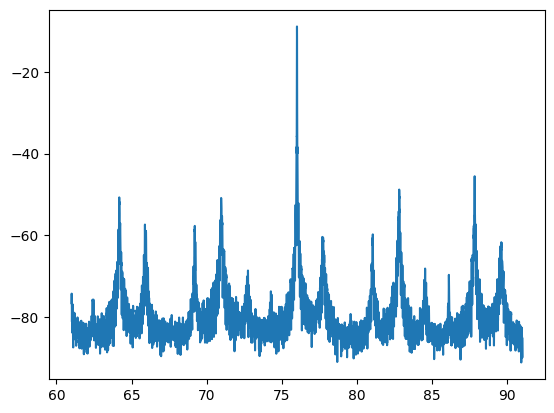

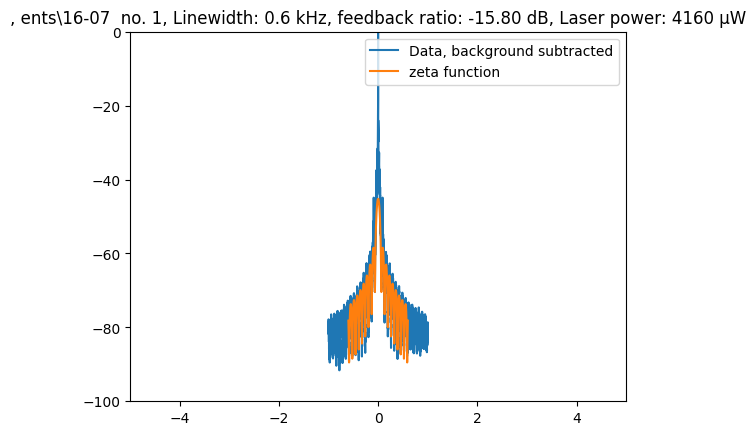

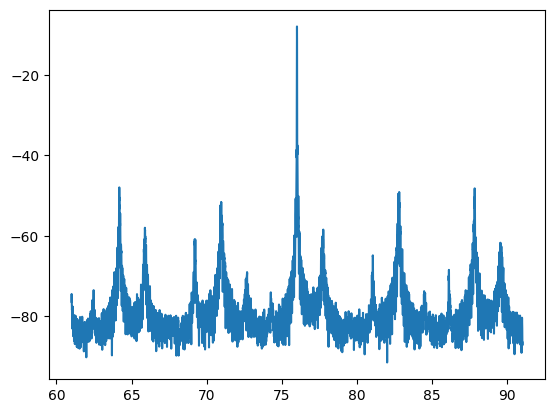

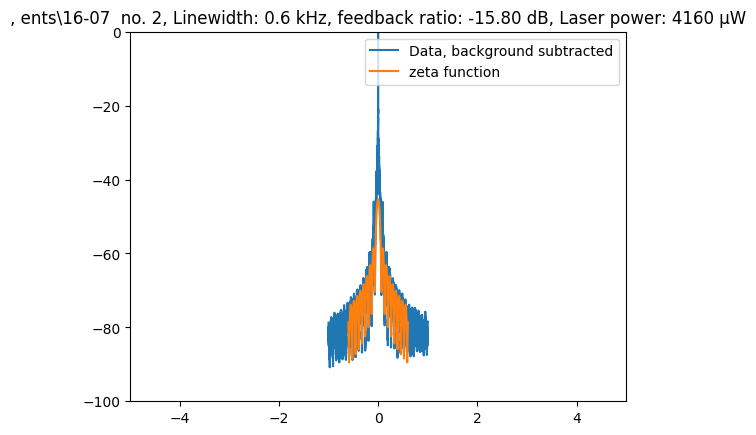

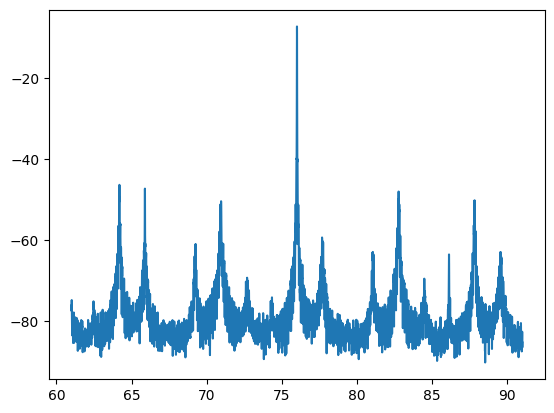

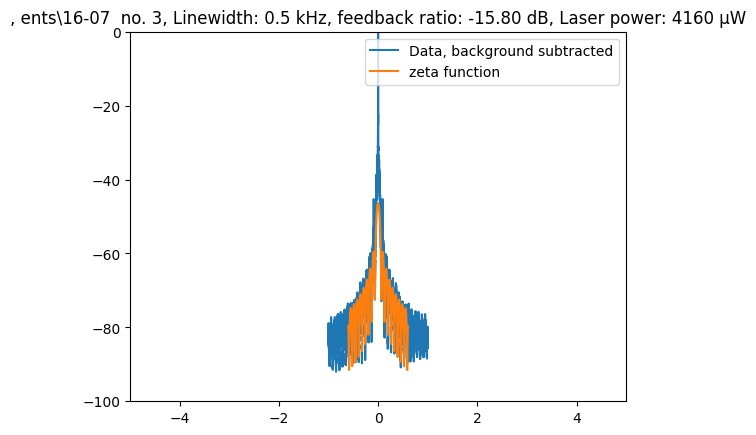

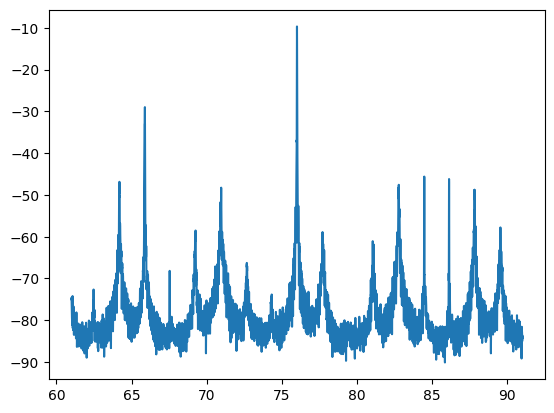

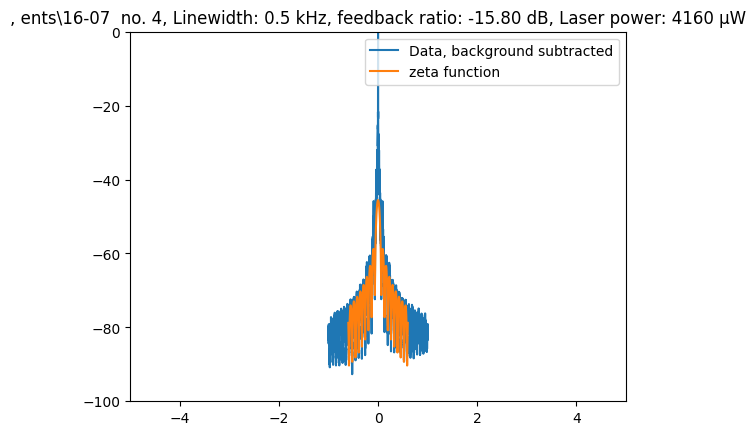

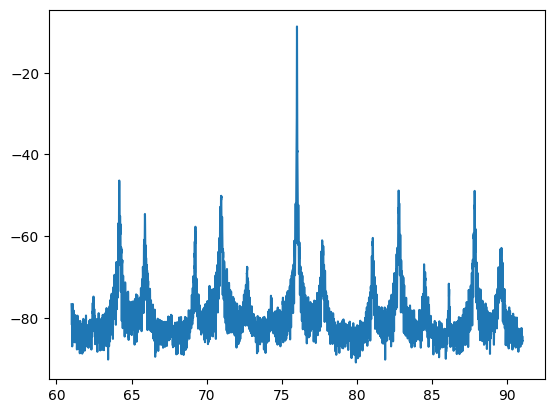

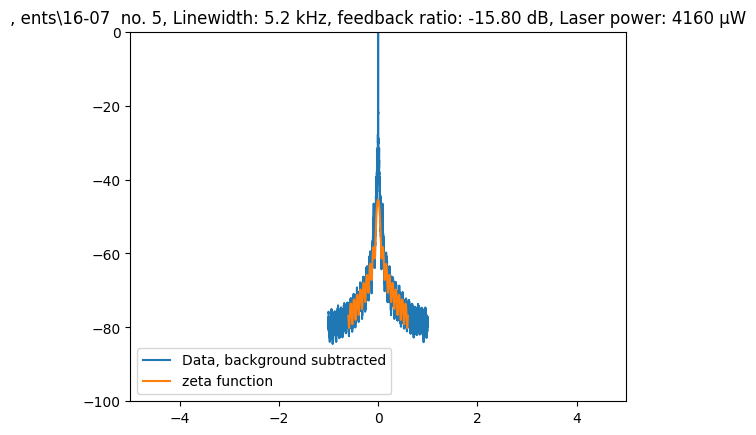

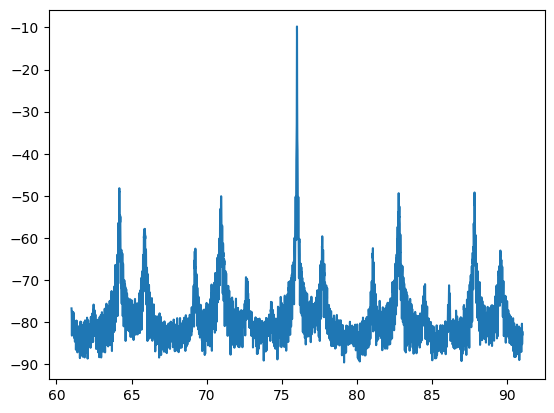

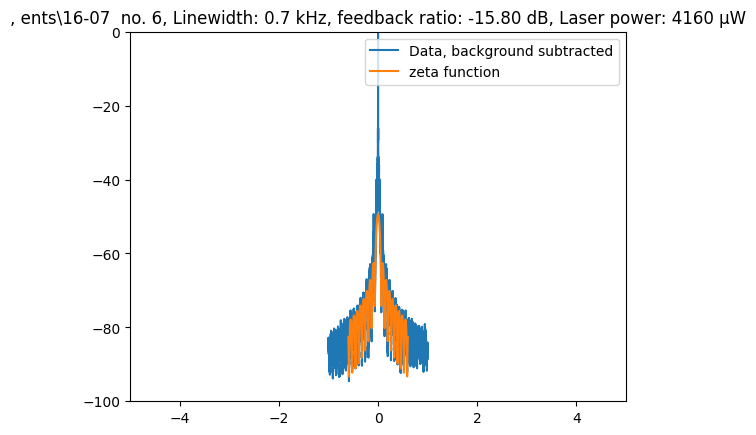

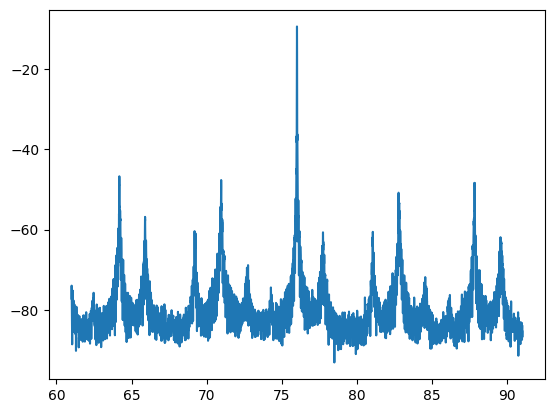

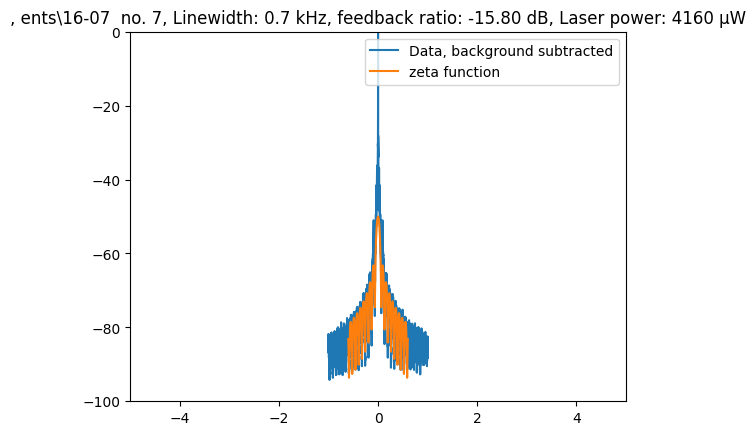

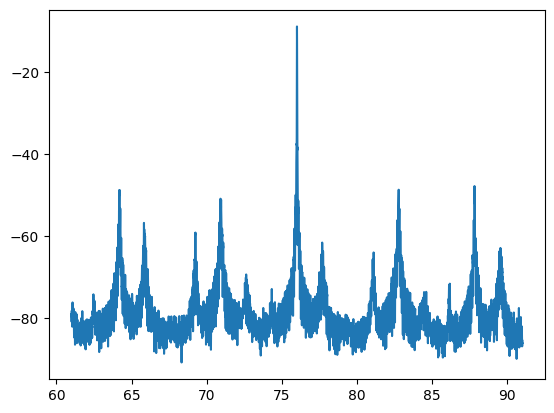

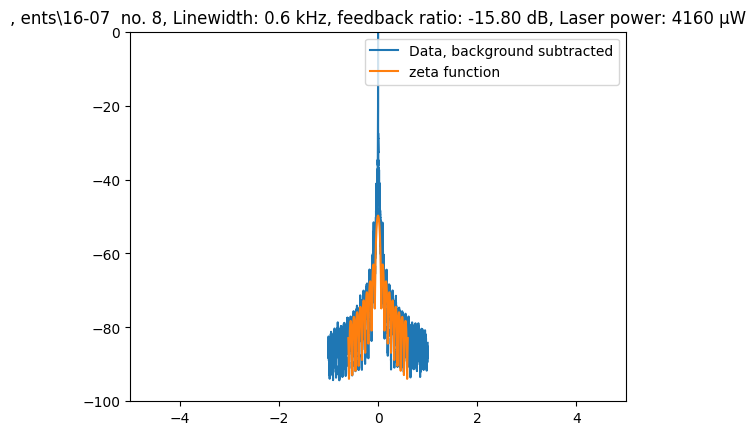

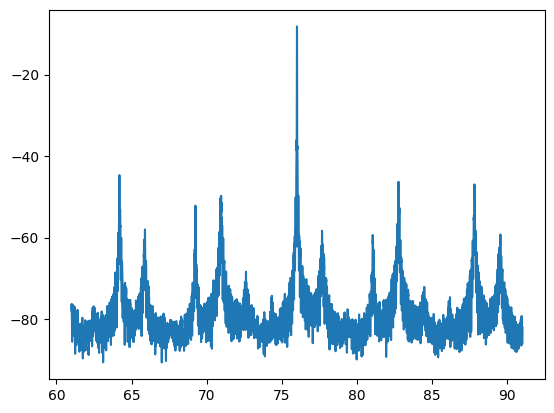

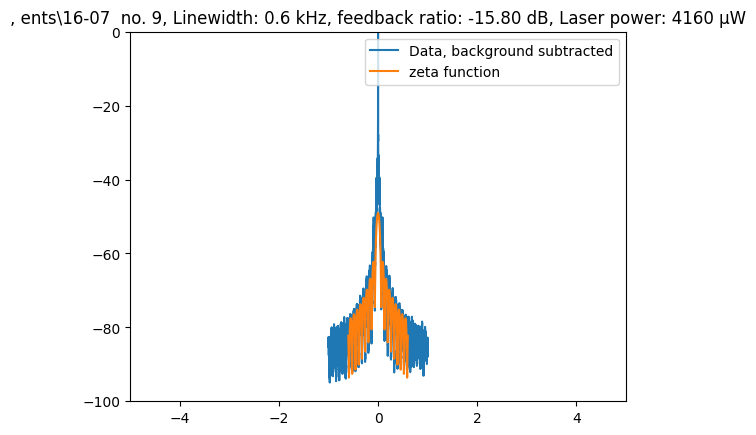

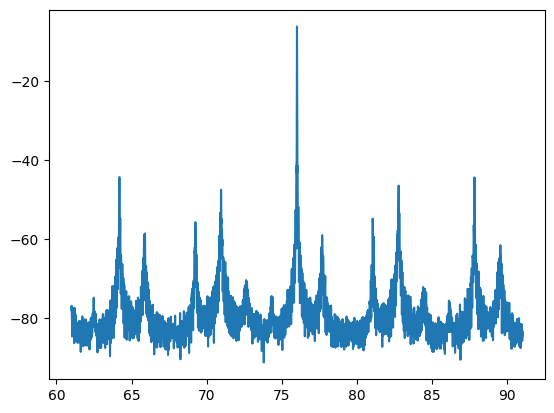

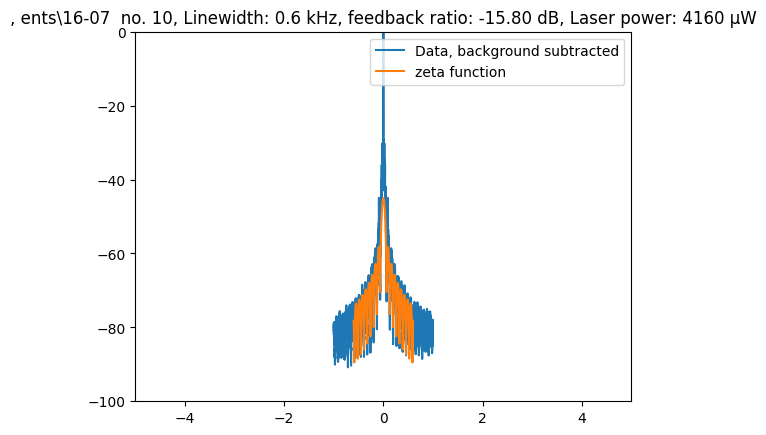

In [30]:

linewidths = [[[None for _ in range(len(dirs[ds_no][fb_meas_index][2])) ] for fb_meas_index in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]

fit_failures = [[[False for _ in range(len(dirs[ds_no][fb_meas_index][2])) ] for fb_meas_index in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]


def get_smsr(fs, ps, center, fsr, plot = False):
    sideband1 = center - fsr
    sideband2 = center + fsr

    filter1 = abs(fs - sideband1) < 1
    ps1 = ps[filter1]
    fs1 = fs[filter1]

    filter2 = abs(fs - sideband2) < 1
    ps2 = ps[filter2]
    fs2 = fs[filter2]

    filter3 = abs(fs - center) < 1
    ps3 = ps[filter3]
    fs3 = fs[filter3]

    if plot:
        plt.plot(fs,ps)
    return max(ps3) - max([max(ps1),max(ps2)])


smsrs = [[[None for _ in range(len(dirs[ds_no][fb_meas_index][2])) ] for fb_meas_index in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]

# Delay [m] : [start_fit [MHz], end_fit [MHz], linewidth_guess [Hz],  ]
fit_settings = {3000 : [0.2, 0.5, 3e3],
                700 : [0.2, 1, 9e3],
                100 : [0.2, 3, 50e3],
                40 : [0.2, 9.5, 400e3],
                30 : [0.2, 9.5, 500e3], }


for data_index in range(datasets_no):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:

    for fb_meas_index in range(len(dirs[data_index])):

        delay_length = delays[data_index][fb_meas_index]

        settings = fit_settings[delay_length]

        filter = (abs(fs) > settings[0]) & (abs(fs) < settings[1])

        lw_guess = settings[2]


        for i, directory in enumerate(dirs[data_index][fb_meas_index][2]): #Close spectrum is index 2
            
            #fs, ps = dp.get_close_spectrum_from_folder(dirs[i],plot=False,center_about_carrier=True)

            fs = measurements[data_index][fb_meas_index][i][0]
            ps = measurements[data_index][fb_meas_index][i][1] - max(measurements[data_index][fb_meas_index][i][1])


            filter = (abs(fs) > settings[0]) & (abs(fs) < settings[1])


            try:
                params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[lw_guess,25,delay_length],bounds=((lw_guess/5e2,-100,delay_length*0.9),(lw_guess*5e1,100,delay_length*1.1)))
            except RuntimeError:
                params = [1e9,25,delay_length]
                # print(f'Fit failed, delay={delay_length} Data_index={data_index}, fb_meas_index={fb_meas_index},no{i}')
                # plt.figure()
                # plt.plot(fs,ps, label = 'data')
                # plt.title(f'Data_index={data_index}, fb_meas_index={fb_meas_index},no{i}, 1 GHz linewidth')

                fit_failures[data_index][fb_meas_index][i] = True




            laser_power = laser_powers[data_index][fb_meas_index]
            feedback_power = feedback_powers[data_index][fb_meas_index]

            feedback_ratio = feedback_ratios[data_index][fb_meas_index]





            linewidths[data_index][fb_meas_index][i] = params[0]
            #linewidth_lor.append(params[0])

            # except RuntimeError:
                # linewidths[data_index][i] = None         


            laser_power = laser_powers[data_index][fb_meas_index]
            feedback_power = feedback_powers[data_index][fb_meas_index]

            feedback_ratio = feedback_ratios[data_index][fb_meas_index]


            fs_full = dirs[data_index][fb_meas_index][1][i].freqs 
            ps_full = dirs[data_index][fb_meas_index][1][i].powers
            plt.figure()
            plt.plot(fs_full,ps_full)

            smsrs[data_index][fb_meas_index][i] = get_smsr(fs_full,ps_full,76,11.7)



            filter_zeta_plot = abs(fs) < 0.6

            plt.figure()
            plt.plot(fs,ps, label = 'Data, background subtracted')
            plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1],params[2]), label = 'zeta function')
            plt.title(f'{data_dirs[data_index][117:-23]}, {data_dirs[data_index][-10:]}  no. {i}, Linewidth: {params[0]*1e-3:.1f} kHz, feedback ratio: {feedback_ratio:.2f} dB, Laser power: {laser_power:.0f} µW')
            plt.legend()

            plt.xlim([-5,5])
            plt.ylim([-100,0])


In [ ]:
linewidths[0][3]

[884.4677365938511,
 868.8340061456258,
 700.0506270970299,
 651.5066885121521,
 609.9884601329796,
 590.3128146118844,
 671.703029658972,
 576.0583750153295,
 675.8918294989775,
 953.0335227058774,
 488.1814345956308,
 1191.0789820706048,
 542.2765495835581,
 376.0889383614468,
 371.5566449447028,
 393.696268329485,
 713.3067152091062,
 477.2753813546968,
 529.4811983749222,
 656.4997547615184]

In [ ]:
def get_smsr(fs, ps, center, fsr, plot = False):
    sideband1 = center - fsr
    sideband2 = center + fsr

    filter1 = abs(fs - sideband1) < 2
    ps1 = ps[filter1]
    fs1 = fs[filter1]

    filter2 = abs(fs - sideband2) < 2
    ps2 = ps[filter2]
    fs2 = fs[filter2]

    filter3 = abs(fs - center) < 2
    ps3 = ps[filter3]
    fs3 = fs[filter3]

    if plot:
        plt.plot(fs,ps)
    return max(ps3) - max([max(ps1),max(ps2)])



fit_settings = {3000 : [0.2, 0.6, 3e3],
        700 : [0.2, 1, 9e3],
        100 : [0.2, 3, 50e3],
        40 : [2, 7.5, 400e3],
        30 : [4, 5.5, 500e3], }

counter_failures = 0

break_off = 500

remove_linewidths = [[[False for _ in range(len(dirs[ds_no][fb_meas_index][2])) ] for fb_meas_index in range(len(dirs[ds_no]))] for ds_no in range(datasets_no)]


for data_index in range(datasets_no):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:

    for fb_meas_index in range(len(dirs[data_index])):


        for i, directory in enumerate(dirs[data_index][fb_meas_index][2]): #Close spectrum is index 2
            delay_length = delays[data_index][fb_meas_index]

            
            if fit_failures[data_index][fb_meas_index][i]:

                if delay_length > 34:
                
                    fs = measurements[data_index][fb_meas_index][i][0]
                    ps = measurements[data_index][fb_meas_index][i][1] - max(measurements[data_index][fb_meas_index][i][1])

                    filter = (abs(fs) > settings[0]) & (abs(fs) < settings[1])

                    delay_length = delays[data_index][fb_meas_index]

                    settings = fit_settings[delay_length]

                    lw_guess = settings[2]

                    #try:
                    params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[lw_guess,25,delay_length*1.15],bounds=((lw_guess/5e1,-100,delay_length*0.95),(lw_guess*5e1,100,delay_length*1.2)))
                    # except RuntimeError:
                    #     params = [1e9,25,delay_length]
                        # print(f'Fit failed, delay={delay_length} Data_index={data_index}, fb_meas_index={fb_meas_index},no{i}')
                        # plt.figure()
                        # plt.plot(fs,ps, label = 'data')
                        # plt.title(f'Data_index={data_index}, fb_meas_index={fb_meas_index},no{i}, 1 GHz linewidth')



                    filter_zeta_plot = abs(fs) < settings[1]

                    smsr = smsrs[data_index][fb_meas_index][i]

                    plt.figure()
                    plt.plot(fs,ps, label = 'data')
                    plt.title(f'Data_index={data_index}, fb_meas_index={fb_meas_index},no{i}, {params[0]*1e-6:.3f}MHz, delay: {params[2]:.0f}, SMSR:{smsr:.1f}')
                    plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1],params[2]), label = 'zeta fit')
                    plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1]-4,params[2]), label = 'zeta fit offset')
                    plt.axvline(x = -11.7, color = 'b', linestyle='--',  label = 'axvline - full height')
                    plt.axvline(x = -10.7, color = 'b', linestyle='--',  label = 'axvline - full height')
                    plt.legend()

                    print(get_smsr(fs,ps,0,11.7))
                    print(ff.R_squared(ps[filter],ff.zeta_fit(fs[filter]*10**6,params[0],params[1],params[2])))

                    if smsr <35:

                        remove_linewidths[data_index][fb_meas_index][i] = True
                     
                    


                counter_failures +=1

                if counter_failures >= break_off:
                    break
            if counter_failures >= break_off:
                    break
        if counter_failures >= break_off:
                    break

                

NameError: name 'datasets_no' is not defined

In [ ]:
def lw_narrowing(fb_power_in_dB,v_0,beta):
    c = 299792458 #m/s
    tau =1#?
    #beta=800
    alpha = 3 #Linewidth enhancement factor
    omega = 2*np.pi*193.41448903*1e12 #Hz
    L_ext = 12 #meters
    tau_ext = L_ext/c

    f_ext = 10**(fb_power_in_dB/10) #P_ext/P_0 ratio, going from dB to ratio

    return v_0/(1+tau*beta*np.sqrt(f_ext)*np.cos(0*omega*tau_ext+np.arctan(alpha)))**2

def lw_broadening(fb_power_in_dB,v_0,beta):
    c = 299792458 #m/s
    tau =1#?
    #beta=800
    alpha = 0 #Linewidth enhancement factor
    omega = 2*np.pi*193.41448903*1e12 #Hz
    L_ext = 12 #meters
    tau_ext = L_ext/c

    f_ext = 10**(fb_power_in_dB/10) #P_ext/P_0 ratio, going from dB to ratio

    return v_0/(1+tau*beta*np.sqrt(f_ext)*np.cos(0*omega*tau_ext+np.arctan(alpha)))**2


fb_power_input = np.linspace(-75,-10,1000)

In [ ]:
def outlier_sorting(dataset):

    new_dataset = [None for _ in range(len(dataset))]
    filter_outlier = [False for _ in range(len(dataset))]


    None_filter = np.array(dataset) != None

    filter_dataset = np.array(dataset)[None_filter]

    method = 'midpoint'

    iqr_number = iqr(filter_dataset, interpolation=method)

    Q1 = np.percentile(filter_dataset,25,method=method)
    
    Q3 = np.percentile(filter_dataset,75,method=method)


    for i,datapoint in enumerate(dataset):
        if datapoint != None:
            if (datapoint < Q3+1.5*iqr_number and datapoint > Q1-1.5*iqr_number):

                new_dataset[i] = datapoint
                filter_outlier[i] = True

    return new_dataset, filter_outlier

In [ ]:
#Something here to remove 1GHz linewidths when manually inserted --  though should check the actual fits first, to see if they are any good..

In [ ]:
# indices = [[] for _ in range(datasets_no)]

smsr_cutoff = 35

for data_index in range(datasets_no):
    for fb_meas_index in range(len(dirs[data_index])):
       
        
        if sum(np.array(linewidths[data_index][fb_meas_index])!=None) > 3: #Outlier sorting doesn't work for n<=3, so only take datasets with 4 datapoints or more.
            _,smsr_filter = outlier_sorting(linewidths[data_index][fb_meas_index])
            plt.figure(1)
            plt.errorbar((feedback_ratios[data_index][fb_meas_index]),np.average(np.array(linewidths[data_index][fb_meas_index])[smsr_filter]),yerr=np.std(np.array(linewidths[data_index][fb_meas_index])[smsr_filter]))#,xerr=np.std(np.array(feedback_ratios[data_index])[smsr_filter]))
            #print(f'FB level is {np.average(np.array(feedback_ratios[data_index])[smsr_filter])} +/- {np.std(np.array(feedback_ratios[data_index])[smsr_filter])}, linewidth is {np.average(np.array(double_filtered_linewidths[data_index])[smsr_filter])} +/- {np.std(np.array(double_filtered_linewidths[data_index])[smsr_filter])}')
    plt.yscale('log')
    plt.xlabel('Feedback ratio [dB]')
    plt.ylabel('Linewidth [Hz]')
    plt.title(f'Before and after zoom; SMSR > {smsr_cutoff}dB')
    plt.ylim([1e2,35e3])
    plt.xlim([-100,-15])
    plt.plot(fb_power_input,lw_narrowing(fb_power_input,1e6,11.5e2),'--',label='Theory')
    plt.plot(fb_power_input,np.ones(len(fb_power_input))*3.2e2,'--',label='linewidth floor')
    plt.legend()
    #plt.savefig(fr'C:\Users\au617810\OneDrive - Aarhus universitet\Videnskabelig assistent\Measurement spectra and plots\Linewidts_FB_IQR\1518nm_double_SMSR_errorbars.pdf')


    plt.figure(1)
    plt.title(f'Before and after zoom; SMSR > {smsr_cutoff}dB')
    plt.yscale('log')
    plt.xlabel('Feedback ratio [dB]')
    plt.ylabel('Linewidth [Hz]')
    plt.ylim([1e2,35e3])
    #plt.savefig(fr'C:\Users\au617810\OneDrive - Aarhus universitet\Videnskabelig assistent\Measurement spectra and plots\Linewidts_FB_IQR\1518nm_double_SMSR_datapoints.pdf')


In [ ]:
GHz_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\11-07 5GHz range"

def path(file):

    return GHz_dir + '\\' + file
    

files_temp = os.listdir(GHz_dir)

files = [path(file) for file in files_temp if file.endswith('.txt')]


In [ ]:
def load_csv_with_header(filename, header_lines_count=2):
    header_lines = []
    with open(filename, 'r') as file:
        for _ in range(header_lines_count):
            header_lines.append(file.readline().strip().replace('# ','').replace('#','').replace(', ',',').replace(':','=').replace(' =','=').replace('= ','=').replace('#  ',''))

        print(header_lines)
    
        data = np.loadtxt(file)

        header_dict = extract_params(header_lines)
        #print(header_dict)


    return header_dict, data


def extract_params(header:list):
    params_dict = {}

    if sum(['=' in file for file in header])<1:
        pass
        print('fail')
    else:
        #Creating the dictionary
        for parameter_string in header:

            
            param_list = parameter_string.split('=')

            key = param_list[0]
            value = param_list[1]
            #Finding the first digit of the float in the value part of the string
            for j, val in enumerate(value):
                if val.isdigit() or val=='-':
                    first_placement = j
                    break
            #Finding the last digit of the float in the value part of the string
            for j in range(len(value)-1,-1,-1):

                if value[j].isdigit():
                    last_placement = j+1
                    break
            #Obtaining the full number and turning it into a float
            try:
                float_value = float(value[first_placement:last_placement])

            except ValueError:
                float_value = value
                #print('The value for' + key + 'is not a float')
            #Saving the key and value in the dictionary
            params_dict[key] = float_value

    return params_dict

In [ ]:
data =[None for _ in range(5)]
header = [None for _ in range(5)]

for i,file in enumerate(files):
    header[i],data[i] = load_csv_with_header(file)
     

['output=3976uW ,', 'fb=112.4uW']
['output=3928uW ,', 'fb=884uW']
['output=3892uW ,', 'fb=443.8uW']
['output=3896uW ,', 'fb=208.9uW,good polarization']
['output=3888uW ,', 'fb=208.9uW,bad/unstable polarization?']


In [ ]:
header[0]

{'output': 3976.0, 'fb': 112.4}

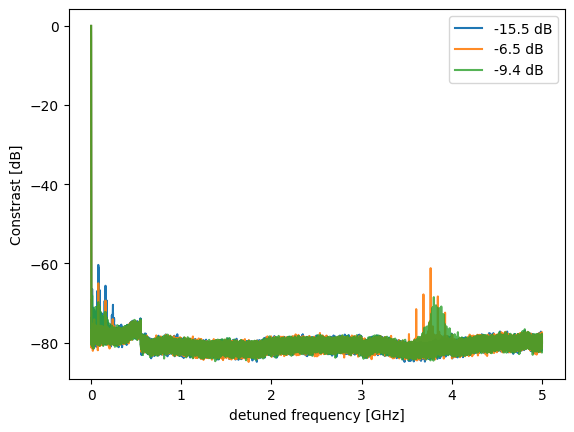

In [ ]:
plt.figure()
for i in range(3):
    plt.plot(data[i][0]*1e-9,data[i][1]-max(data[i][1]),label=f'{linear_to_dB(header[i]['fb']/header[i]['output']):.1f} dB',alpha = 1-i/10)
plt.xlabel('detuned frequency [GHz]')
plt.ylabel('Constrast [dB]')
plt.legend()
plt.savefig(r'./GHz_range_spectrum.pdf')
plt.savefig(r'./GHz_range_spectrum.png')

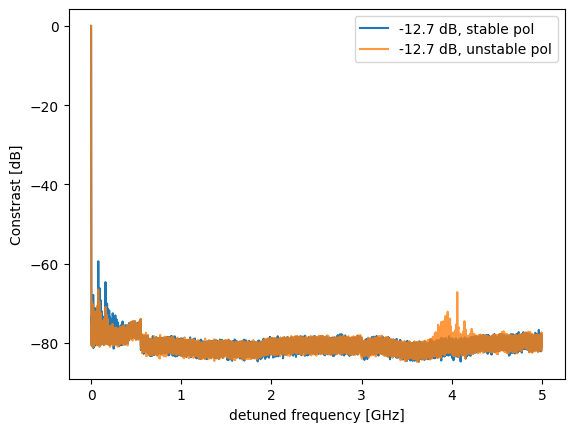

In [ ]:
pol = ['stable pol','unstable pol']
plt.figure()
for i in range(3,5):
    plt.plot(data[i][0]*1e-9,data[i][1]-max(data[i][1]),label=f'{linear_to_dB(header[i]['fb']/header[i]['output']):.1f} dB, {pol[i-3]}',alpha = 1-(i-3)/5)
plt.xlabel('detuned frequency [GHz]')
plt.ylabel('Constrast [dB]')
plt.legend()
plt.savefig(r'./GHz_spectrum_stable_unstable.pdf')
plt.savefig(r'./GHz_spectrum_stable_unstable.png')